# Metody Obliczeniowe w Nauce i Technice
# Laboratorium 11: Faktoryzacja QR
## Przemysław Roman

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time
from copy import deepcopy

def time_exec(func, *args):
    start_time = time.time()
    result = func(*args)
    return result, time.time() - start_time

np.random.seed(42743)

## Zadanie 1

In [8]:
def factorize_qr(A):
    n = A.shape[0]
    Q = deepcopy(A)
    R = np.zeros((n, n))

    for i in range(n):
        for j in range(i):
            Q[:,i] -= np.dot(Q[:,j], A[:,i]) * Q[:,j]

        Q_tmp = Q[:,i]
        Q[:,i] = Q_tmp / np.linalg.norm(Q_tmp)

    for i in range(n):
        for j in range(i, n):
            R[i,j] = np.dot(Q[:,i], A[:,j])

    return Q, R

In [9]:
def test_factorize_qr(A):
    def print_res(Q, R, A_ret):
        print(f'Q:\n{Q}')
        print(f'R:\n{R}')
        print(f'A odtworzone:\n{A_ret}')

    print(f'A wejściowe:\n{A}\n')

    Q, R = factorize_qr(A)
    A_ret = Q @ R
    print('Wynik implementacji:')
    print_res(Q, R, A_ret)

    print()

    Q_lib, R_lib = np.linalg.qr(A)
    A_ret_lib = Q_lib @ R_lib
    print('Wynik funkcji np.linalg.qr:')
    print_res(Q_lib, R_lib, A_ret_lib)

    np.testing.assert_allclose(A_ret, A_ret_lib)

In [12]:
test_factorize_qr(np.random.rand(3, 3))

A wejściowe:
[[0.88736653 0.39277359 0.007292  ]
 [0.37994075 0.90305521 0.8233933 ]
 [0.84273576 0.01848606 0.2215478 ]]

Wynik implementacji:
Q:
[[ 0.69249938  0.0129613  -0.72130203]
 [ 0.29650514  0.90637327  0.30095216]
 [ 0.65766961 -0.42227894  0.62381983]]
R:
[[1.28139685 0.5519137  0.39489531]
 [0.         0.81578969 0.65284122]
 [0.         0.         0.38074817]]
A odtworzone:
[[0.88736653 0.39277359 0.007292  ]
 [0.37994075 0.90305521 0.8233933 ]
 [0.84273576 0.01848606 0.2215478 ]]

Wynik funkcji np.linalg.qr:
Q:
[[-0.69249938 -0.0129613  -0.72130203]
 [-0.29650514 -0.90637327  0.30095216]
 [-0.65766961  0.42227894  0.62381983]]
R:
[[-1.28139685 -0.5519137  -0.39489531]
 [ 0.         -0.81578969 -0.65284122]
 [ 0.          0.          0.38074817]]
A odtworzone:
[[0.88736653 0.39277359 0.007292  ]
 [0.37994075 0.90305521 0.8233933 ]
 [0.84273576 0.01848606 0.2215478 ]]


In [10]:
test_factorize_qr(np.random.rand(5, 5))

A wejściowe:
[[0.2390588  0.54052886 0.29648804 0.3828963  0.8537433 ]
 [0.23682602 0.22079533 0.70796483 0.15754046 0.12639917]
 [0.82570677 0.58246559 0.21085938 0.15440359 0.8240793 ]
 [0.08712008 0.69279587 0.68069796 0.3439085  0.82413457]
 [0.47192634 0.26482033 0.6080995  0.29359326 0.62017811]]

Wynik implementacji:
Q:
[[ 0.23608726  0.47127305 -0.23093998  0.66025194 -0.48259571]
 [ 0.23388222  0.03433247  0.7017536  -0.30164467 -0.60056038]
 [ 0.81544307 -0.1378122  -0.43352821 -0.35751033 -0.01732164]
 [ 0.08603716  0.85324515  0.13015475 -0.3093792   0.3897622 ]
 [ 0.4660602  -0.17234706  0.49932118  0.49954853  0.5041964 ]]
R:
[[ 1.01258665  0.83724801  0.74949755  0.41957124  1.26305672]
 [ 0.          0.72752998  0.61097209  0.40741709  0.88942057]
 [ 0.          0.          0.72916547  0.14654887 -0.04879092]
 [ 0.          0.          0.          0.19035185  0.28578014]
 [ 0.          0.          0.          0.          0.13171048]]
A odtworzone:
[[0.2390588  0.5405288

In [11]:
test_factorize_qr(np.random.rand(10, 10))

A wejściowe:
[[0.57621931 0.02007675 0.4613883  0.00687552 0.76833496 0.33832477
  0.59245162 0.5358383  0.60633659 0.88081372]
 [0.90842086 0.49310035 0.82096689 0.29607283 0.43051837 0.90538215
  0.50412776 0.74962754 0.24791376 0.73792224]
 [0.8782509  0.77010169 0.80343445 0.10788891 0.37469227 0.81432546
  0.85549883 0.7532114  0.83247135 0.85370882]
 [0.06488705 0.4774141  0.37699256 0.66656514 0.32267732 0.32495486
  0.68380906 0.11310205 0.77926885 0.36147096]
 [0.95393095 0.88715356 0.8497979  0.03412865 0.87141106 0.18747384
  0.0282307  0.96067823 0.84926853 0.00606099]
 [0.97670806 0.37990482 0.51645901 0.58312886 0.18042729 0.54183378
  0.0900016  0.22356619 0.67744124 0.82870744]
 [0.01862531 0.69483344 0.97775893 0.29179044 0.89045028 0.29771492
  0.53394902 0.64041528 0.87699547 0.98353104]
 [0.19985931 0.70637026 0.61535143 0.2101171  0.69978031 0.44631952
  0.20541087 0.38485513 0.61716575 0.85779886]
 [0.90416591 0.0187555  0.68063087 0.57445072 0.9448431  0.58150235

In [128]:
def generate_matrices(N, n):
    As = [None] * N
    A = np.random.rand(n, n)
    U, E, V = np.linalg.svd(A)
    cond = 2

    for i in range(N):
        D = np.linspace(cond, 1, n)
        cond *= 1 + np.random.random()
        As[i] = U @ np.diag(D) @ V

    return As

def create_plot(As, n):
    conds = []; norms = []

    for A in As:
        Q, R = factorize_qr(A)
        conds.append(np.linalg.cond(A))
        norms.append(np.linalg.norm(np.identity(n) - Q.T @ Q))

    plt.scatter(conds, norms, marker='.')
    plt.plot()

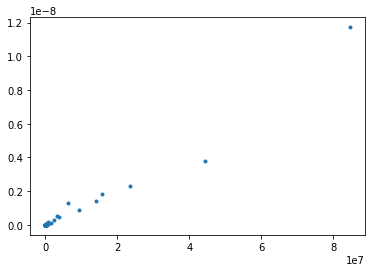

In [139]:
N = 50; n = 8
As = generate_matrices(N, n)
create_plot(As, n)